In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

## **EDA y Regresión para TCH**

#### **Análisis de variables numéricas y categoricas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [6]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


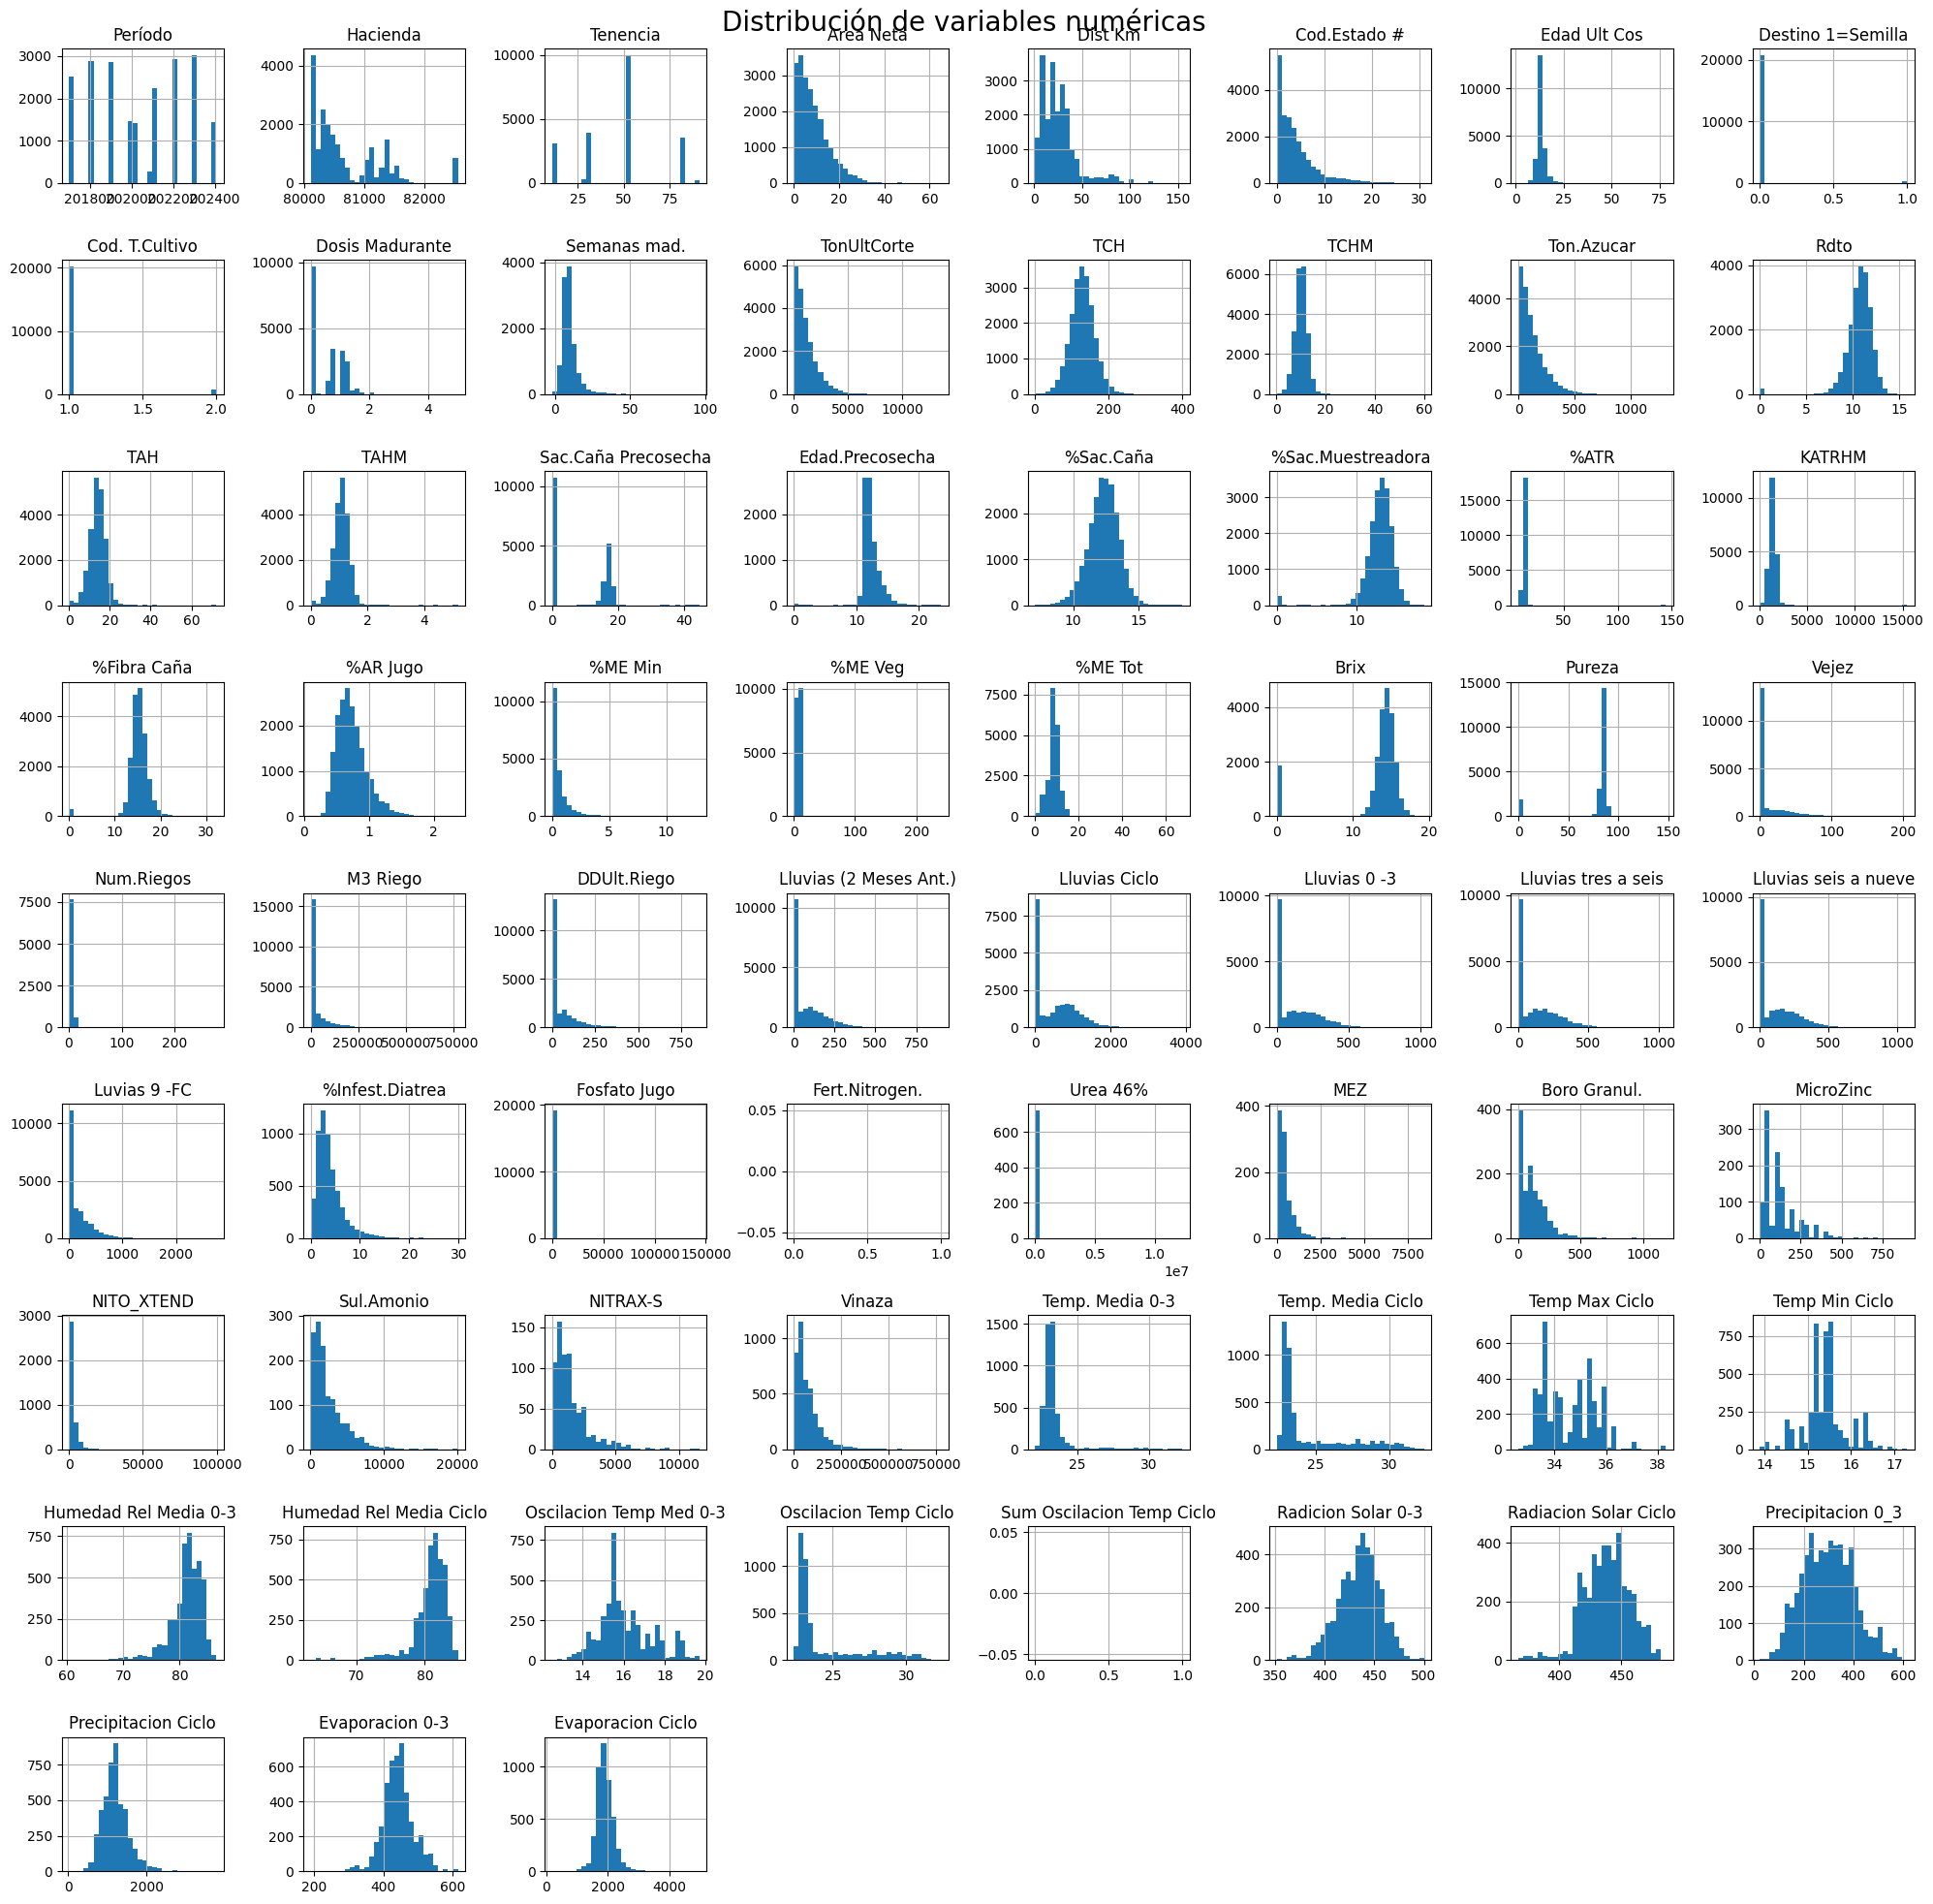

In [7]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

---
### **Limpieza: Identificadores** 

Limpieza de variables como `Periodo`, `Hacienda`, `Nombre`, `Suerte`, `Cod.Estado`, `F.Siembra` debido a posible data leakage o variables que no aportan prediccion porque pueden hacer las veces de identificadores más que de predictores. 

In [8]:
REDUNDANT_FEATURES = ['Período', 'Hacienda', 'Nombre', 'Suerte', 'Cod.Estado', 'F.Siembra', 'Ult.Riego', 'Cerca de', 'Tenencia', 'Zona', 'Cosechó', 'Cultivo']
df = df.drop(columns = REDUNDANT_FEATURES)

---
### **Matrices de Correlación**  
Matrices de correlación orientadas a TCH y %Sac.Caña, al igual que matriz de correlación general

In [9]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns

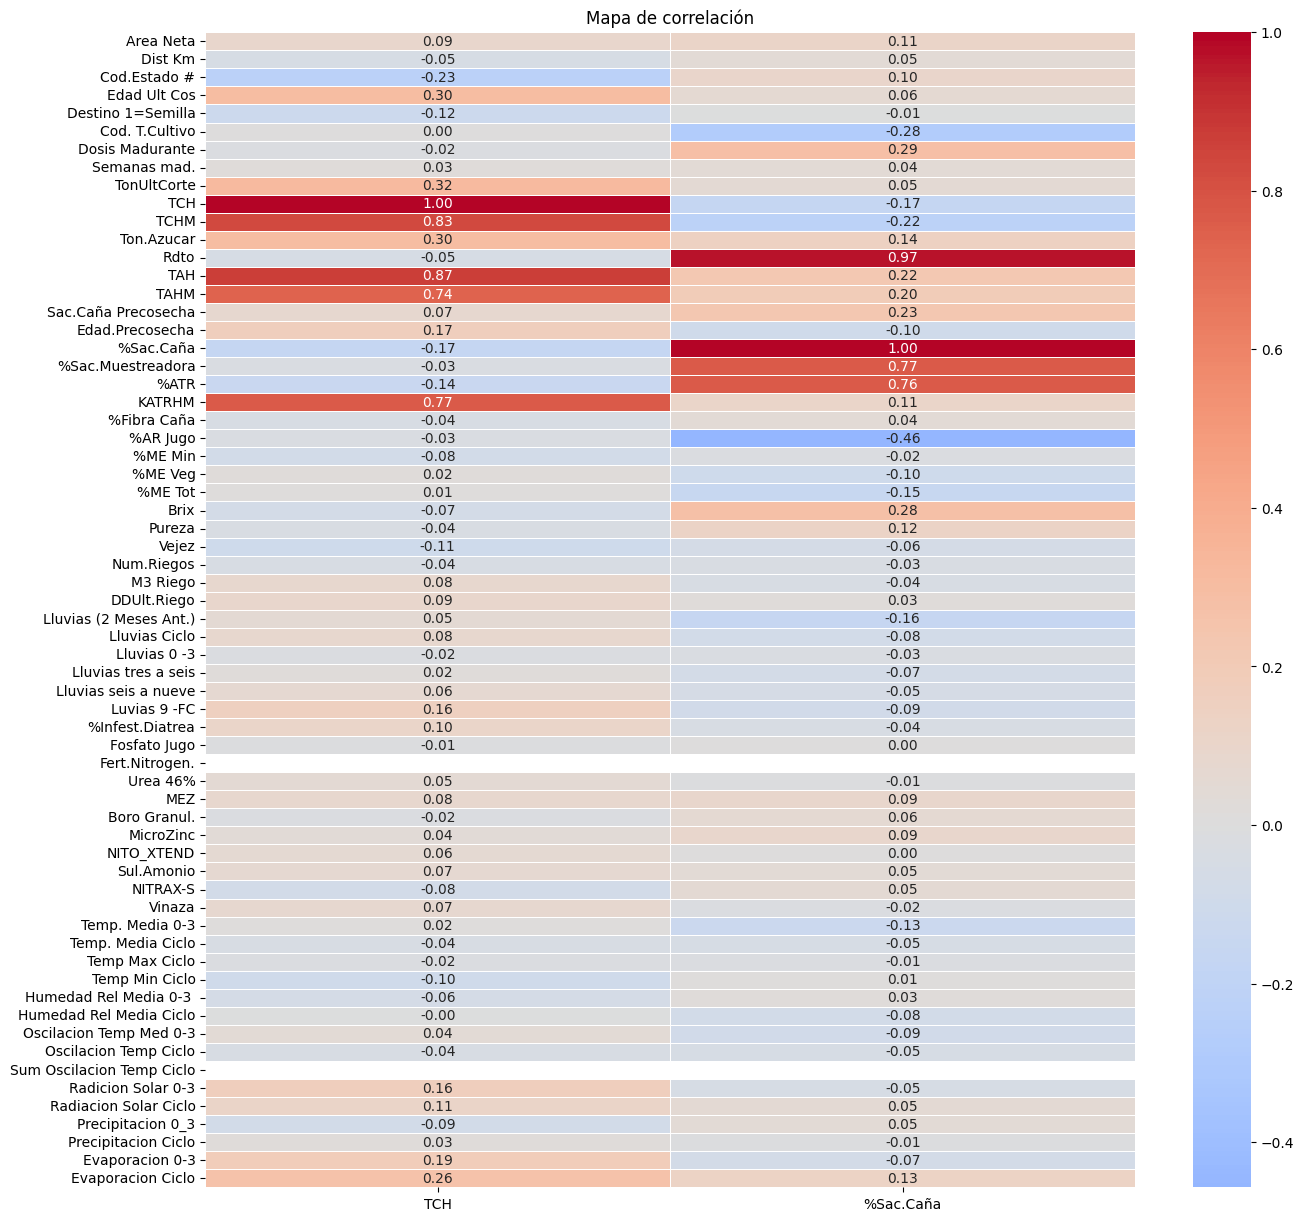

In [10]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

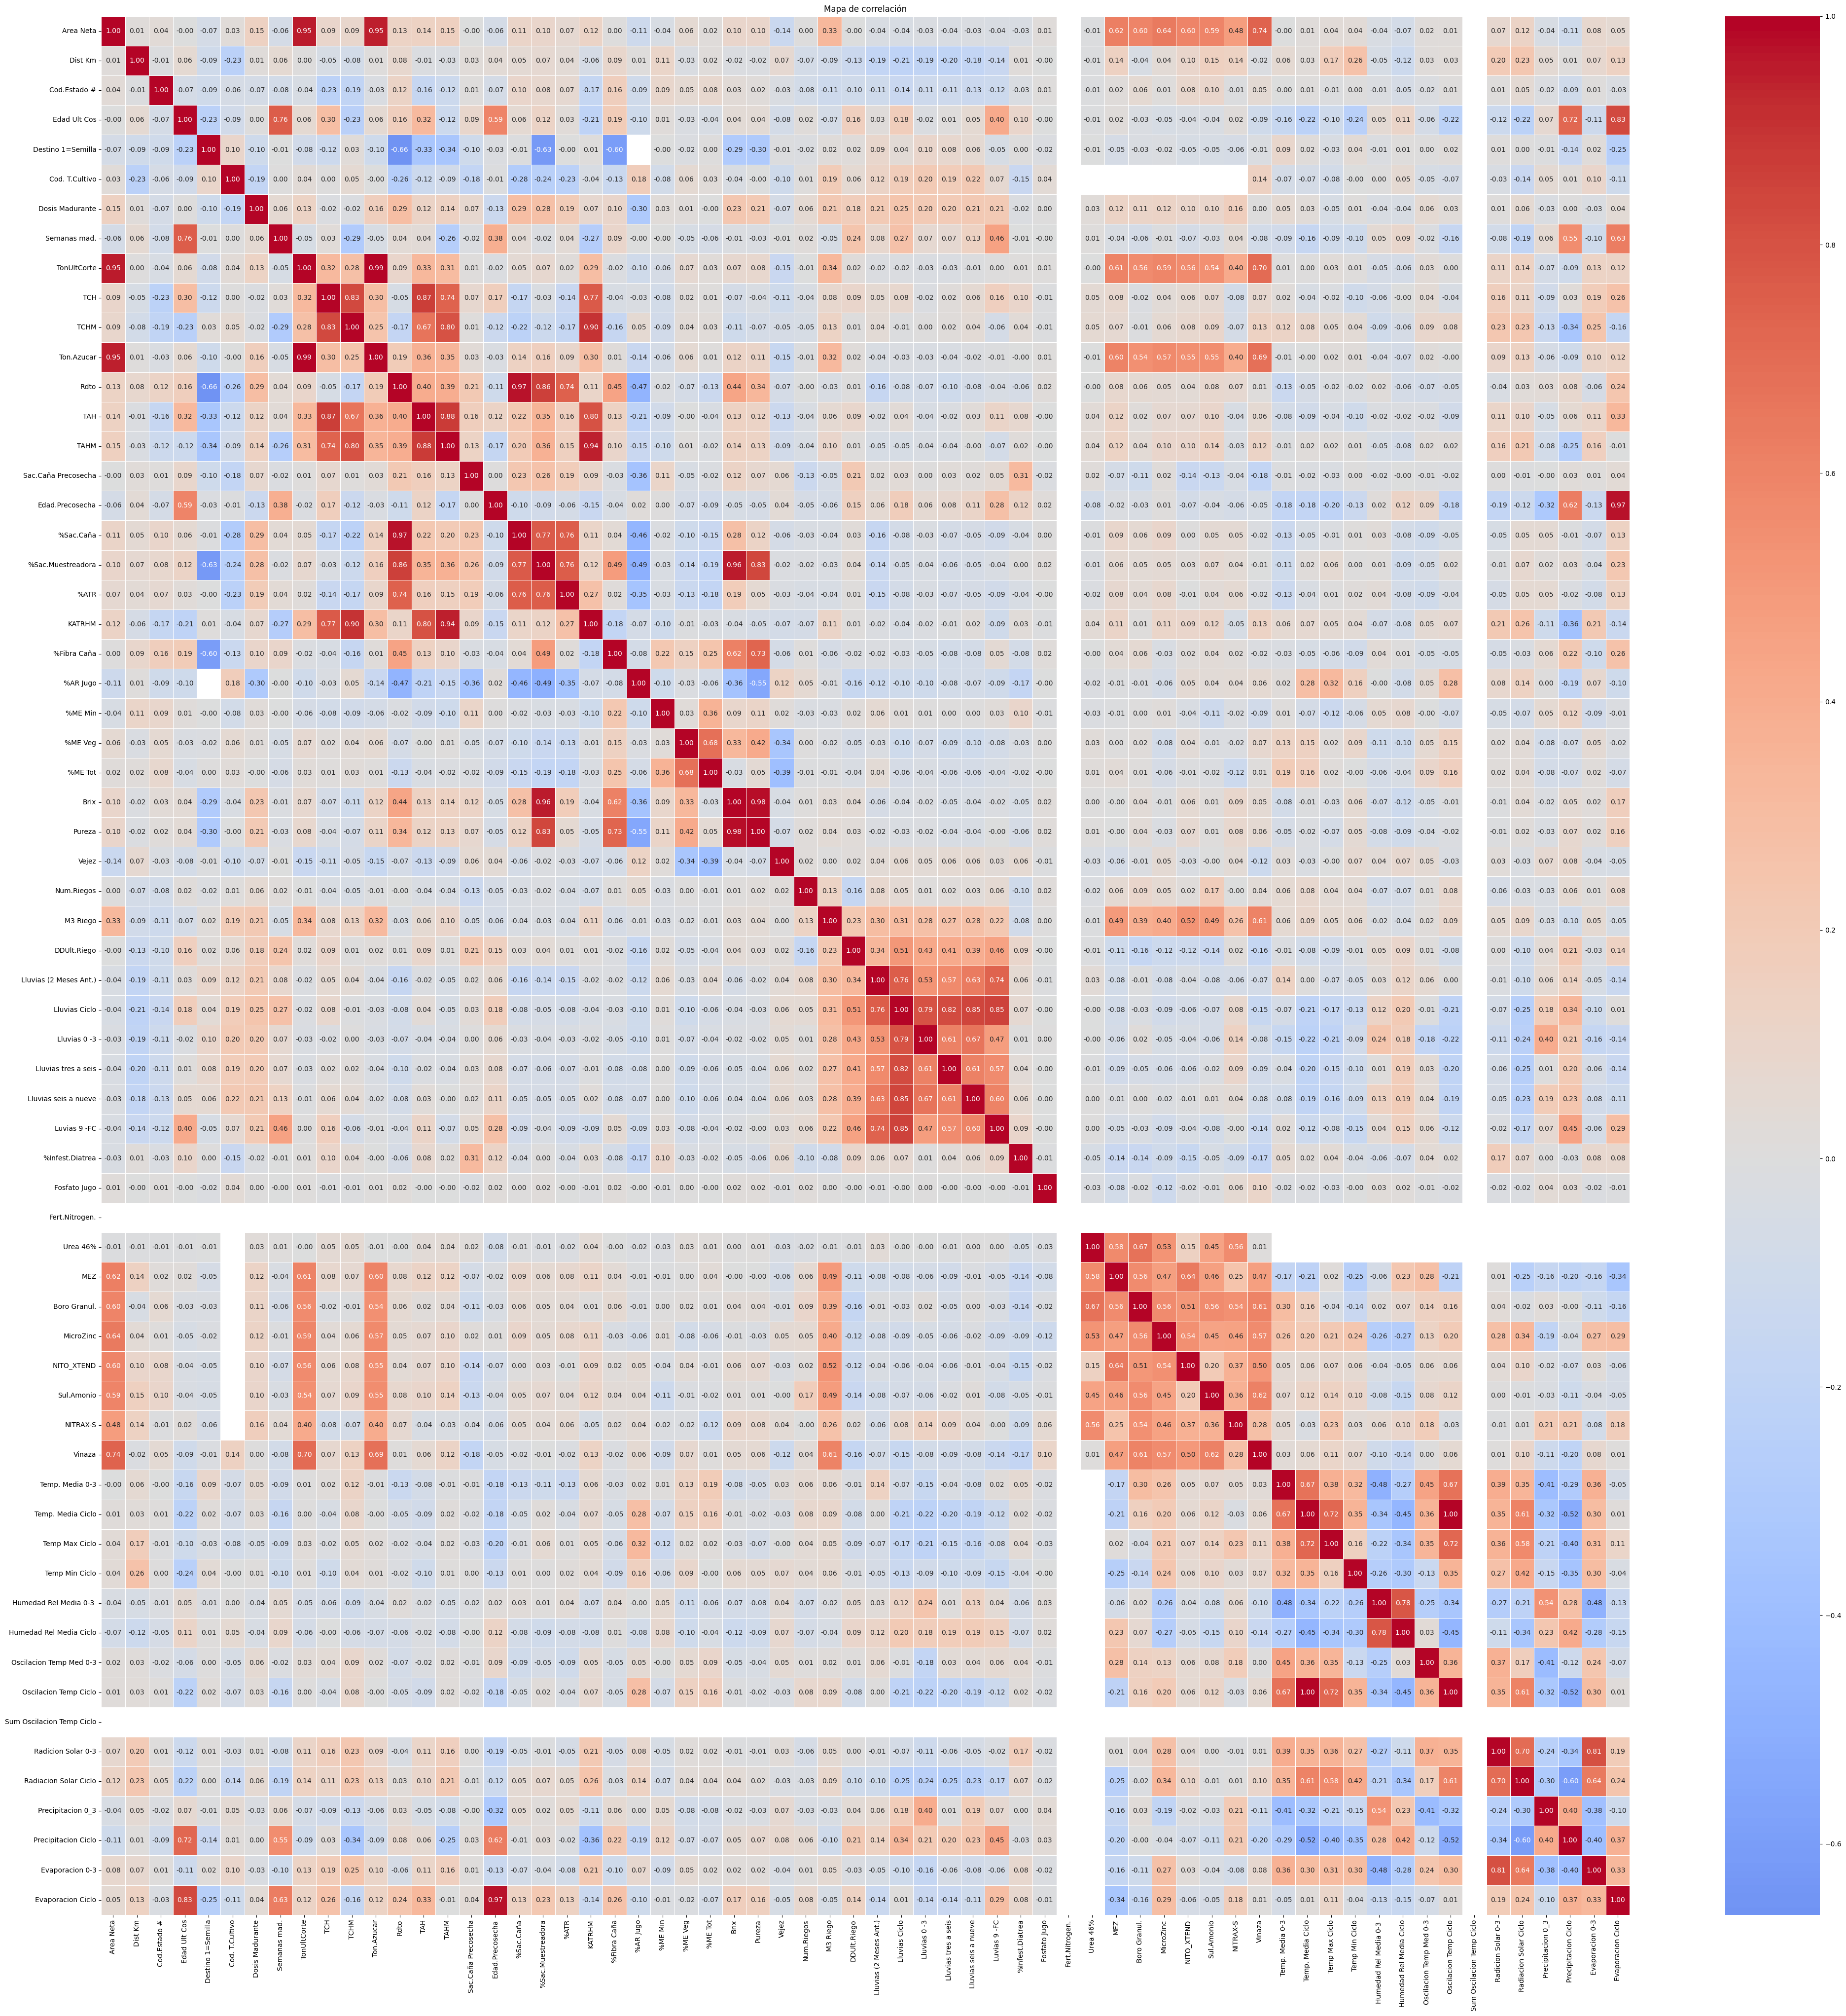

In [11]:
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Se observa multicolinealidad entre algunas variables al igual que altas correlaciones entre variable objetivo y posibles leaks. 

---
### **Limpieza: Leakage para TCH**
Se eliminan variables que se obtienen despues de la cosecha de la caña y que no influyen en la predicción de TCH. 

In [12]:
TCH_LEAKAGE = ['TonUltCorte', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'TCHM']

df = df.drop(columns = TCH_LEAKAGE)

---
### **Limpieza: Variables de Riego**  
Se revisan features relacionadas con riego para eliminar multicolinealidad

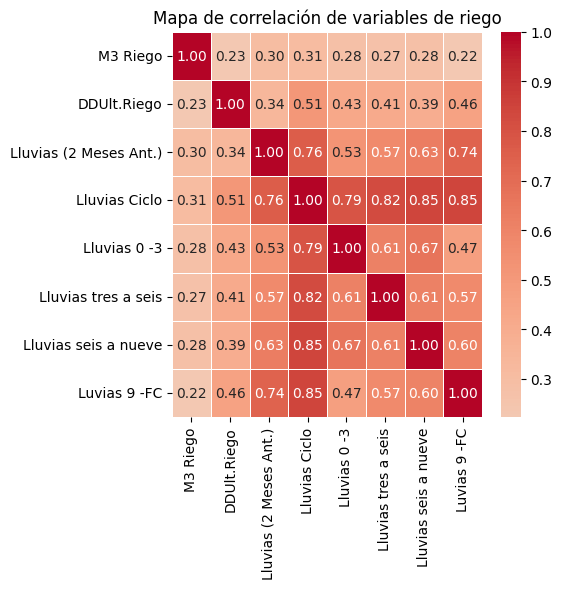

In [13]:
IRRIGATION_FEATURES = ['M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']

plt.figure(figsize=(5,5))
numerical_irrig_df = df[IRRIGATION_FEATURES]
irrig_corr = numerical_irrig_df.corr()
sns.heatmap(irrig_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()

In [14]:
IRRIGATION_DEPURE = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']
IRRIGATION_FEATURES = [f for f in IRRIGATION_FEATURES if f not in IRRIGATION_DEPURE]
df = df.drop(columns = IRRIGATION_DEPURE)
df[IRRIGATION_FEATURES]

M3 Riego  DDUlt.Riego  Lluvias Ciclo
0           0.00            0         1038.0
1           0.00            0            0.0
2       48513.60          107         1002.0
3           0.00            0            0.0
4           0.00            0          991.0
...          ...          ...            ...
21022   16605.96           27         1123.0
21023    6435.60           25         1139.0
21024    9564.96           25         1139.0
21025  289740.00           40          905.0
21026    7440.90           76          921.0

[21027 rows x 3 columns]

---
### **Limpieza: Variables del clima**  
Se revisan variables relacionadas del clima por si existe alguna multicolinealidad entre las mismas

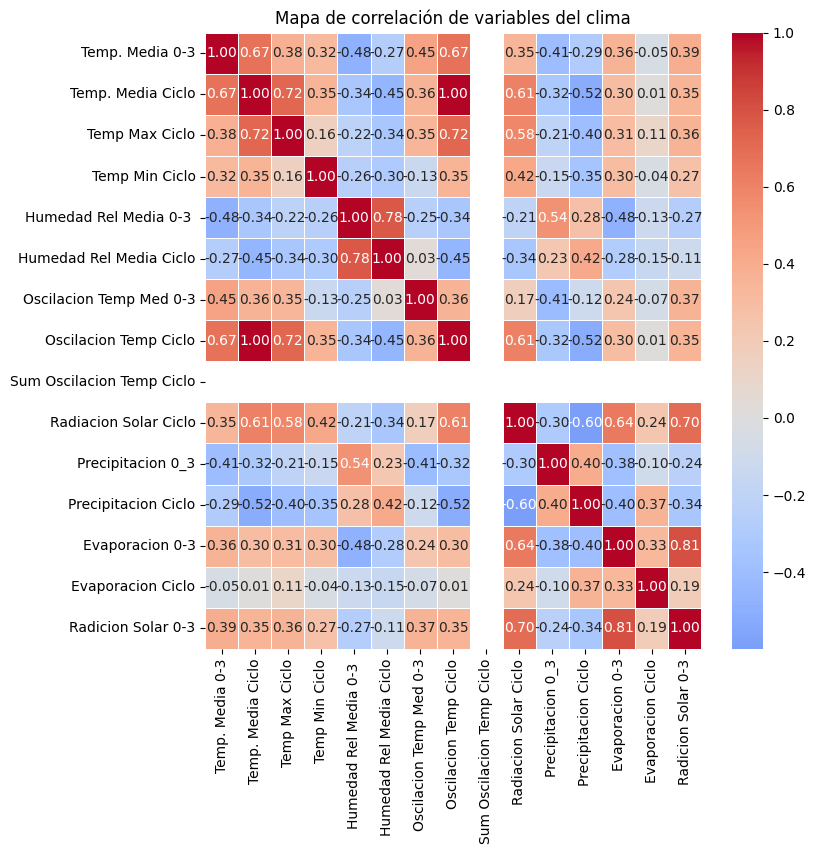

In [15]:
WEATHERING_FEATURES = ['Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Radicion Solar 0-3']

plt.figure(figsize=(8,8))
numerical_weathering_df = df[WEATHERING_FEATURES]
weathering_corr = numerical_weathering_df.corr()
sns.heatmap(weathering_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables del clima")
plt.show()



In [16]:
WEATHERING_DEPURE = ['Temp. Media 0-3', 'Humedad Rel Media 0-3 ', 'Oscilacion Temp Med 0-3', 'Sum Oscilacion Temp Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Radicion Solar 0-3']
WEATHERING_FEATURES = [f for f in WEATHERING_FEATURES if f not in WEATHERING_DEPURE]
df = df.drop(columns = WEATHERING_DEPURE)
df[WEATHERING_FEATURES]

Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
0                    NaN             NaN             NaN   
1                    NaN             NaN             NaN   
2                    NaN             NaN             NaN   
3                    NaN             NaN             NaN   
4                    NaN             NaN             NaN   
...                  ...             ...             ...   
21022             31.089            35.4            16.6   
21023             30.945            35.4            16.6   
21024             30.945            35.4            16.6   
21025             31.040            35.4            16.6   
21026             30.890            35.4            16.6   

       Humedad Rel Media Ciclo  Oscilacion Temp Ciclo  Radiacion Solar Ciclo  \
0                          NaN                    NaN                    NaN   
1                          NaN                    NaN                    NaN   
2                          NaN                    NaN                    NaN   
3                          NaN                    NaN                    NaN   
4                          NaN                    NaN                    NaN   
...                        ...                    ...                    ...   
21022                   78.797                 31.089                444.382   
21023                   78.704                 30.945                444.528   
21024                   78.704                 30.945                444.528   
21025                   78.720                 31.040                444.839   
21026                   78.687                 30.890                444.372   

       Evaporacion Ciclo  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
21022             1824.6  
21023             1867.2  
21024             1867.2  
21025             1843.9  
21026             1881.2  

[21027 rows x 7 columns]

---
### **Distribucion Final**

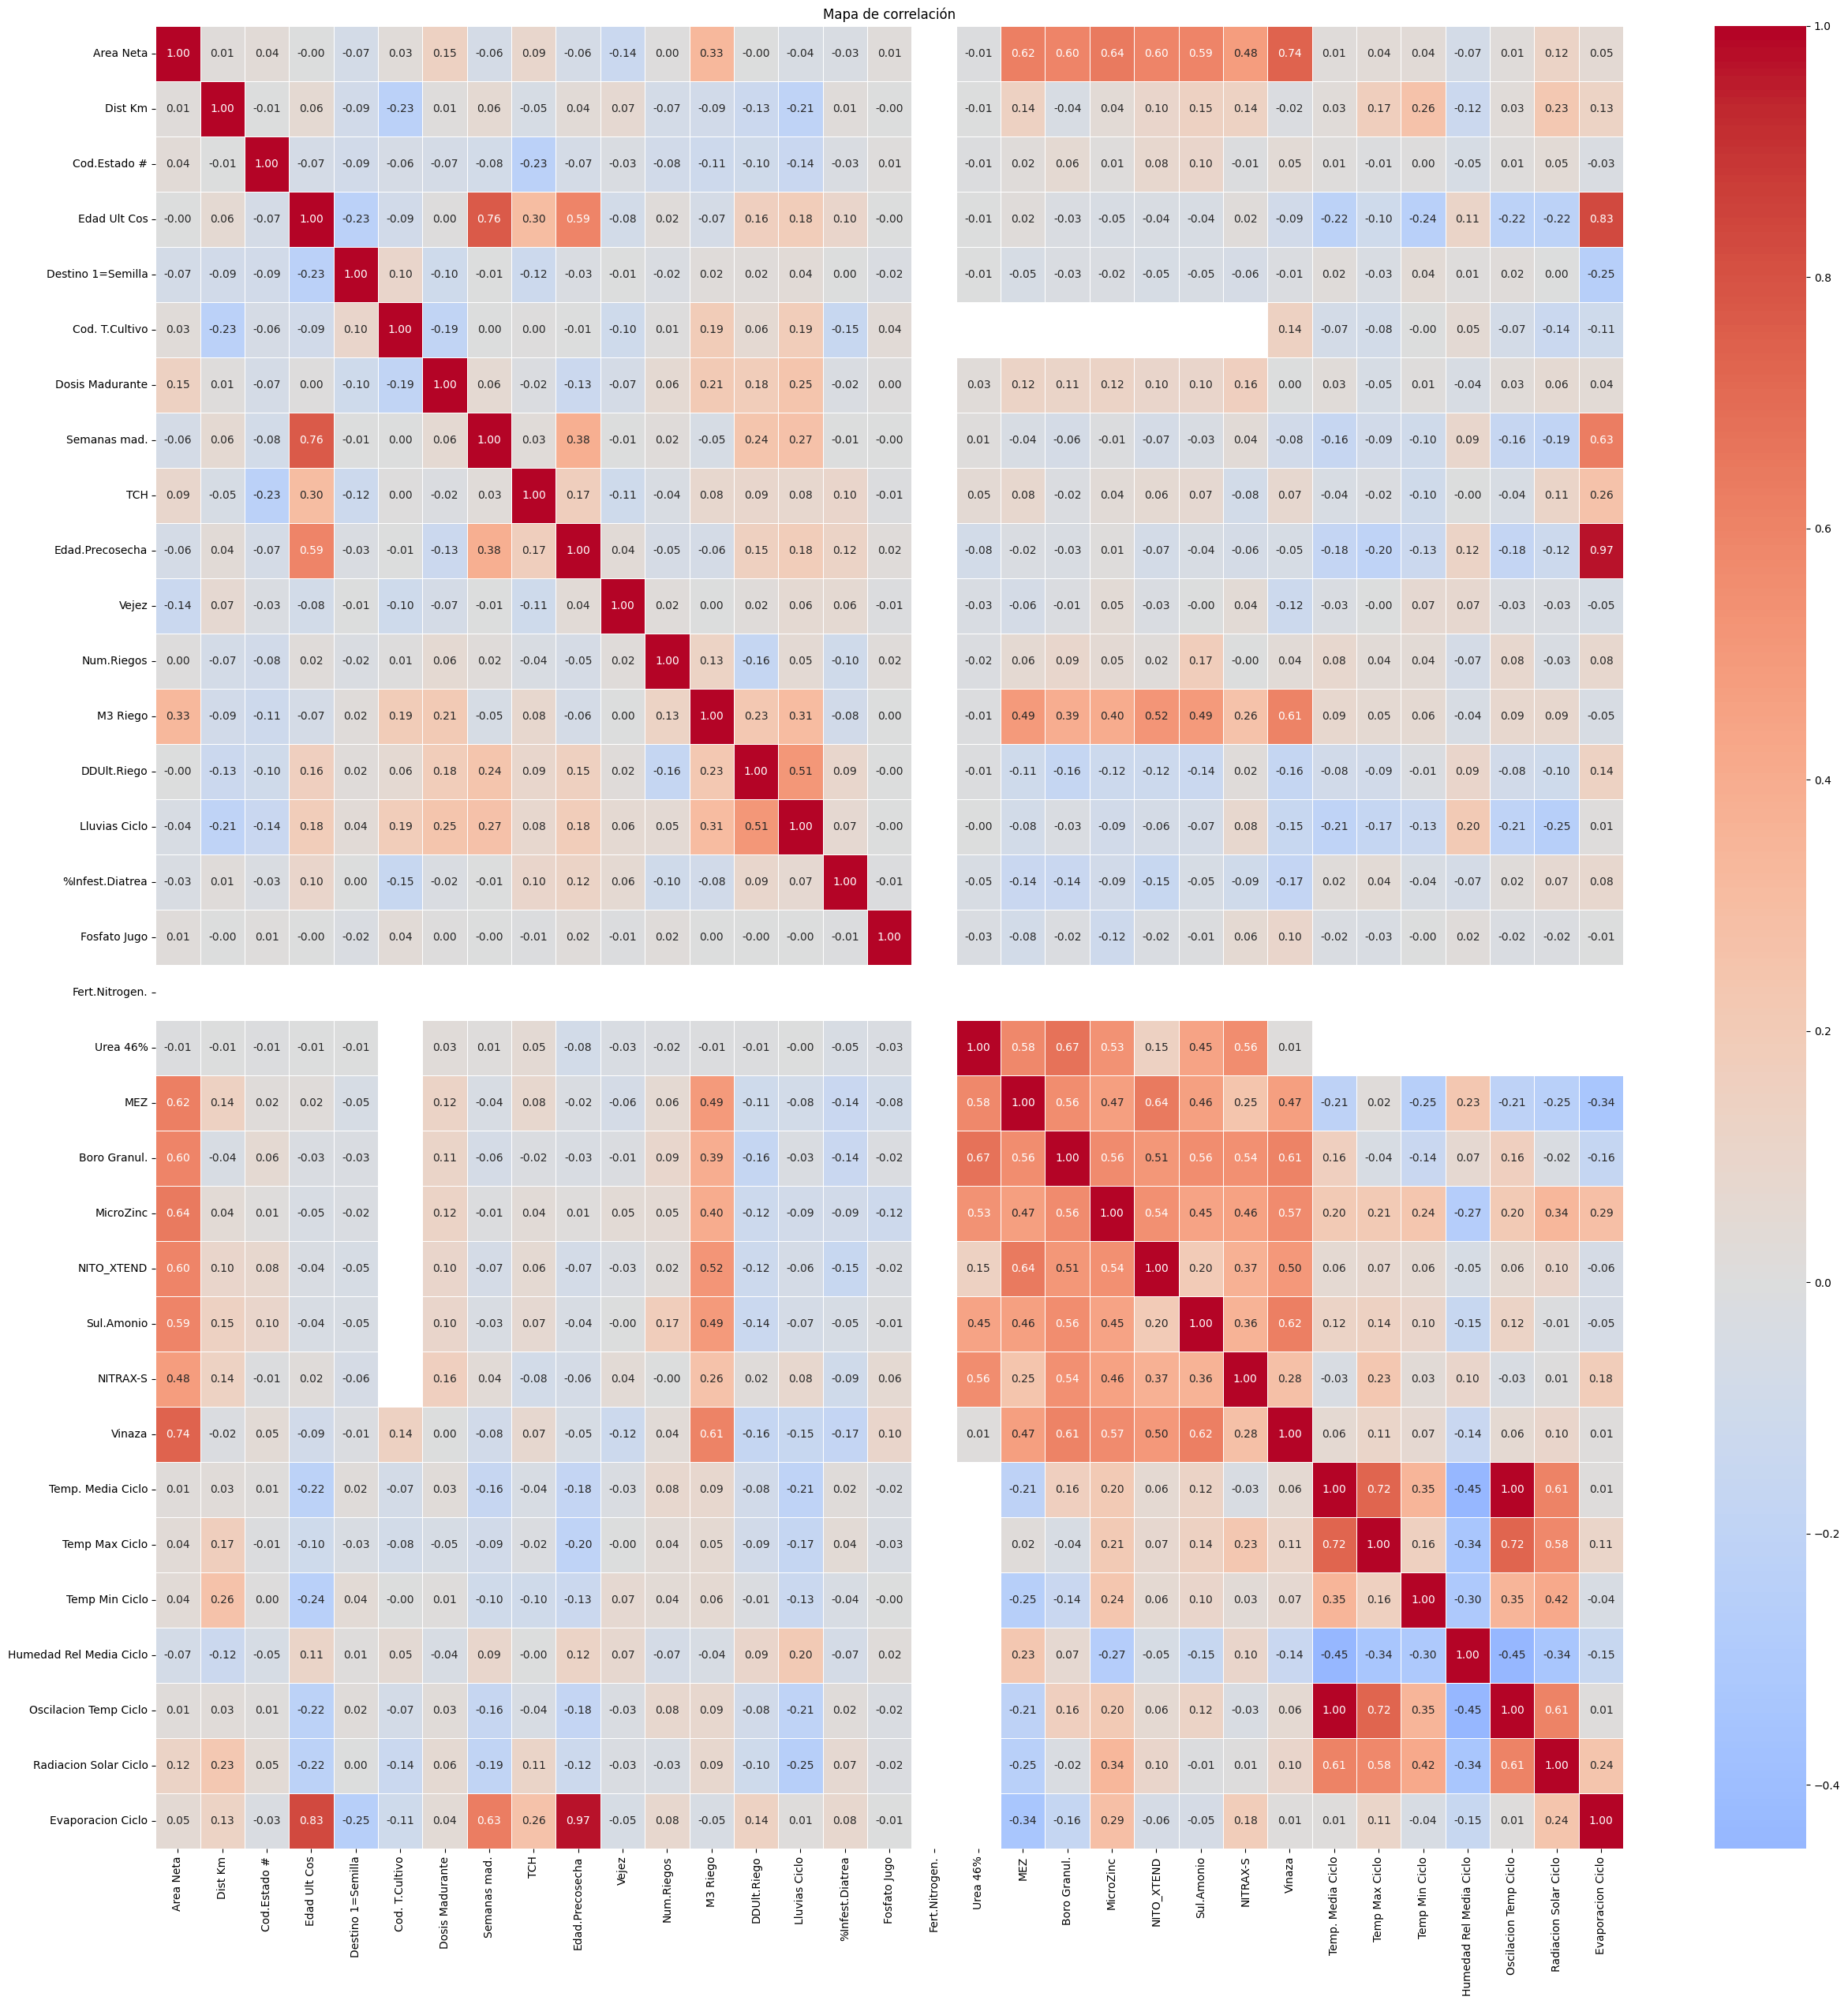

In [17]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(numerical_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

---
### **Distribución de TCH**

In [18]:
#df['TCH'].describe()

In [19]:
'''
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['TCH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de TCH")

sns.boxplot(y=df['TCH'], ax=axes[1])
axes[1].set_title("Boxplot de TCH")

plt.tight_layout()
plt.show()
'''

'\nfig, axes = plt.subplots(1, 2, figsize=(12, 5))\n\nsns.histplot(df[\'TCH\'], bins=20, kde=True, ax=axes[0])\naxes[0].set_title("Histograma de TCH")\n\nsns.boxplot(y=df[\'TCH\'], ax=axes[1])\naxes[1].set_title("Boxplot de TCH")\n\nplt.tight_layout()\nplt.show()\n'

In [20]:
'''
Q1 = df['TCH'].quantile(0.25)
Q3 = df['TCH'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar
df_filtered = df[
    (df['TCH'] >= limite_inferior) & 
    (df['TCH'] <= limite_superior)
]
'''

"\nQ1 = df['TCH'].quantile(0.25)\nQ3 = df['TCH'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Límites\nlimite_inferior = Q1 - 1.5 * IQR\nlimite_superior = Q3 + 1.5 * IQR\n\n# Filtrar\ndf_filtered = df[\n    (df['TCH'] >= limite_inferior) & \n    (df['TCH'] <= limite_superior)\n]\n"

In [21]:
'''
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_filtered['TCH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de TCH")

sns.boxplot(y=df_filtered['TCH'], ax=axes[1])
axes[1].set_title("Boxplot de TCH")

plt.tight_layout()
plt.show()
'''

'\nfig, axes = plt.subplots(1, 2, figsize=(12, 5))\n\nsns.histplot(df_filtered[\'TCH\'], bins=20, kde=True, ax=axes[0])\naxes[0].set_title("Histograma de TCH")\n\nsns.boxplot(y=df_filtered[\'TCH\'], ax=axes[1])\naxes[1].set_title("Boxplot de TCH")\n\nplt.tight_layout()\nplt.show()\n'

In [22]:
'''
df_filtered.shape
'''

'\ndf_filtered.shape\n'

### **Gráficos de Dispersión respecto a TCH**

c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


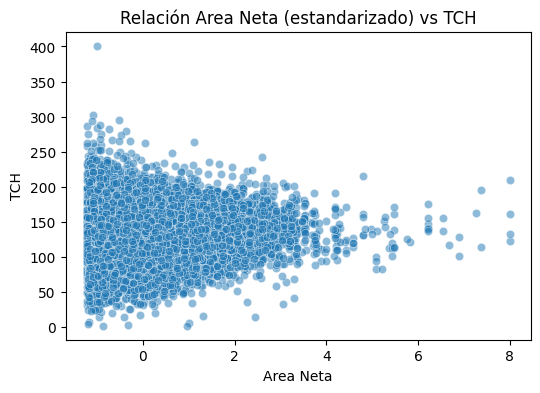

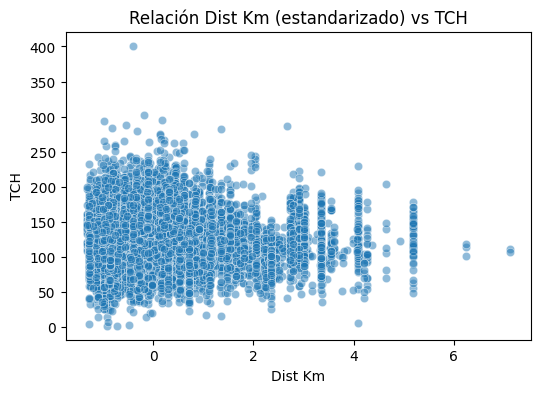

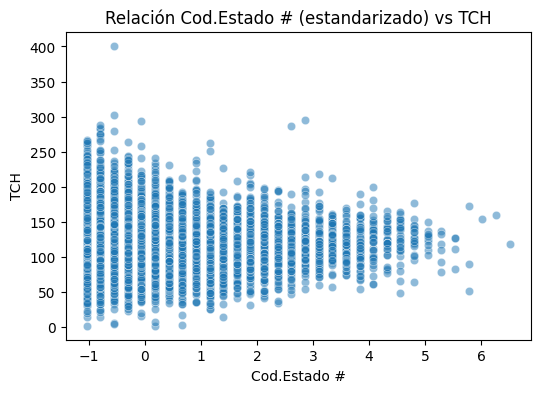

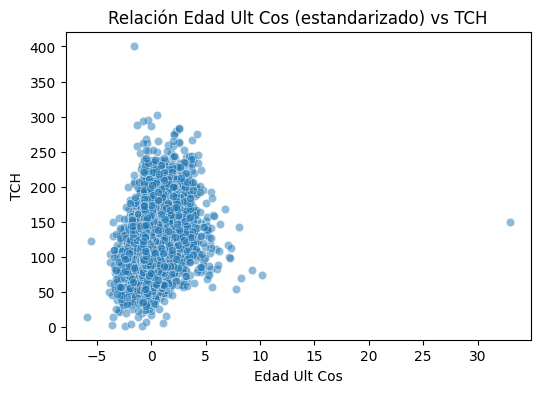

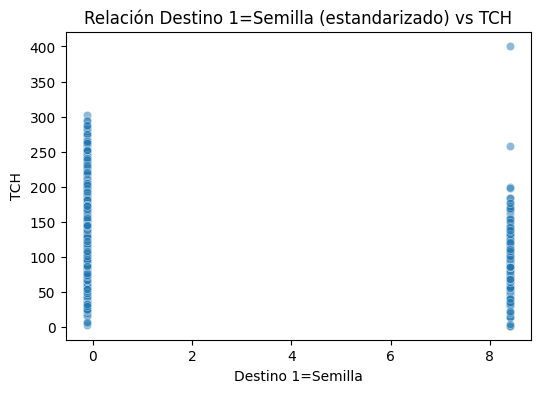

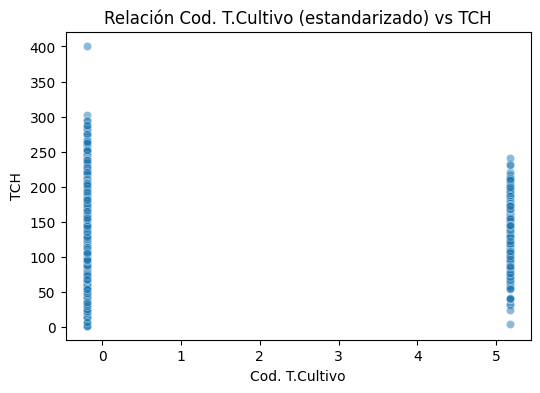

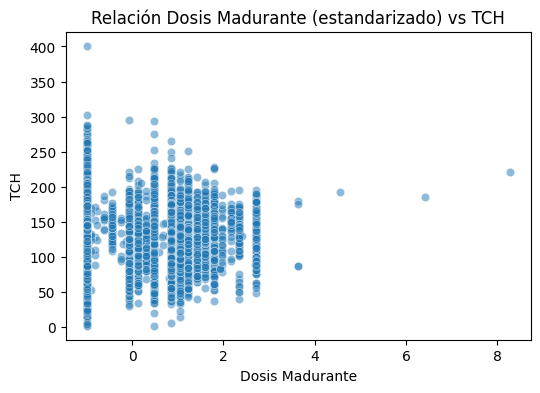

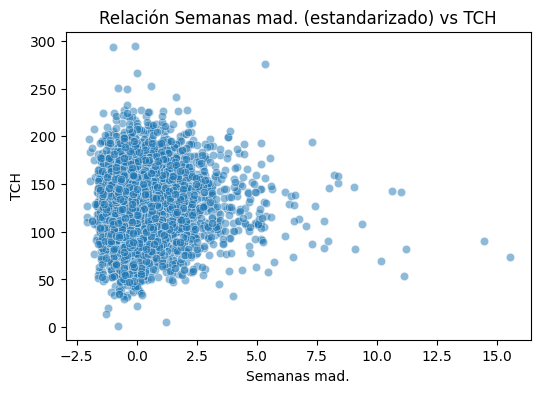

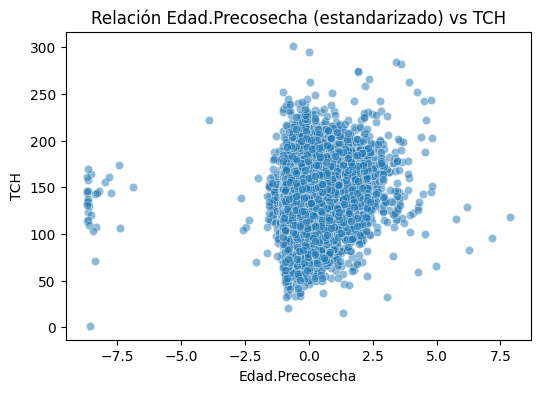

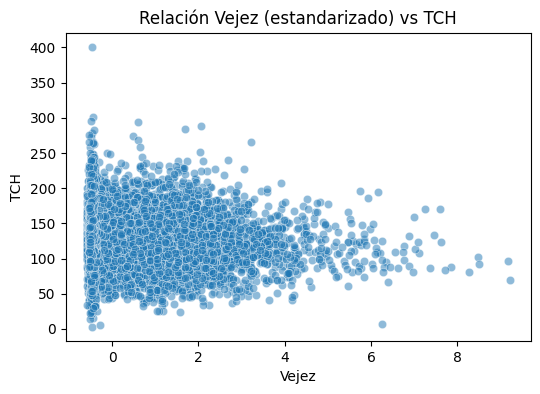

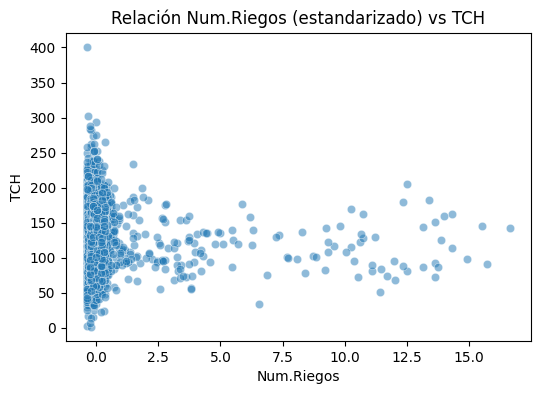

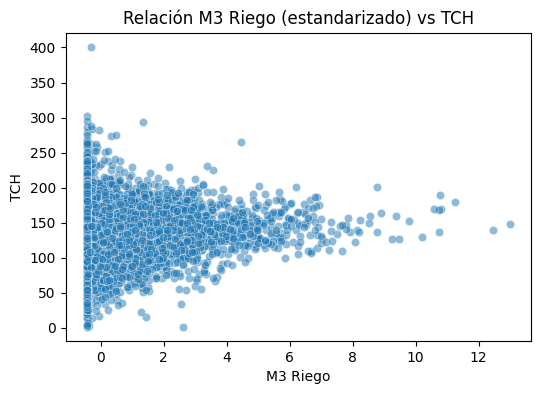

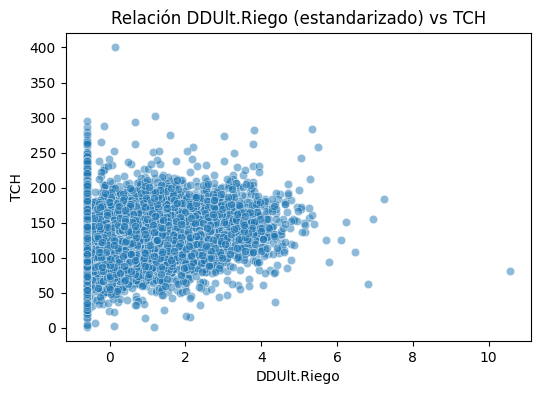

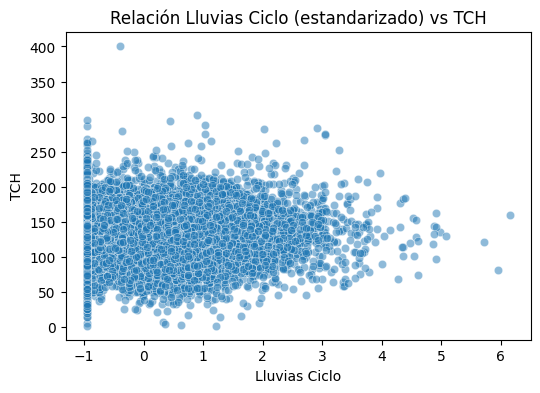

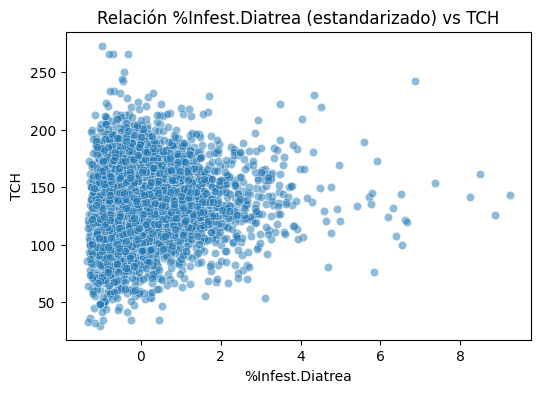

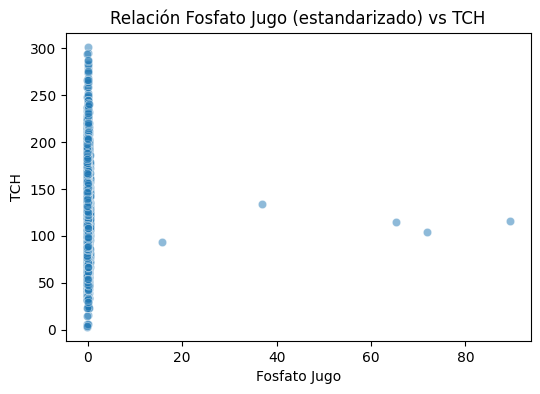

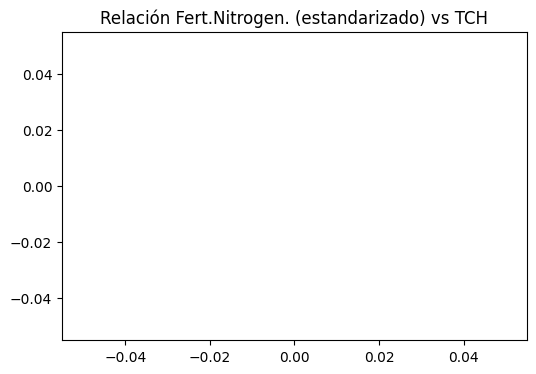

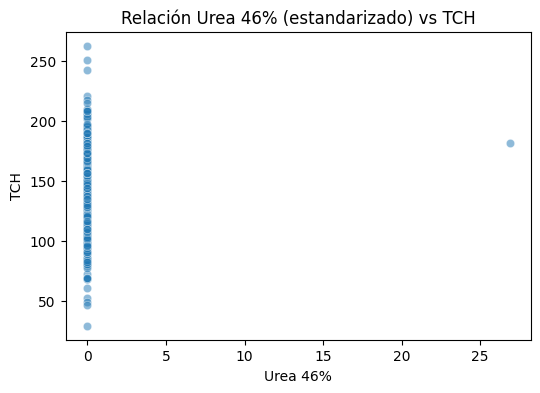

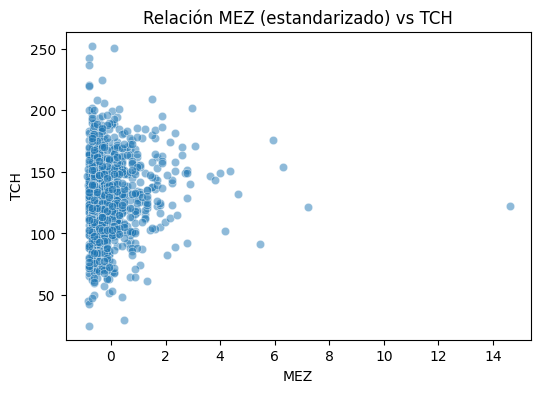

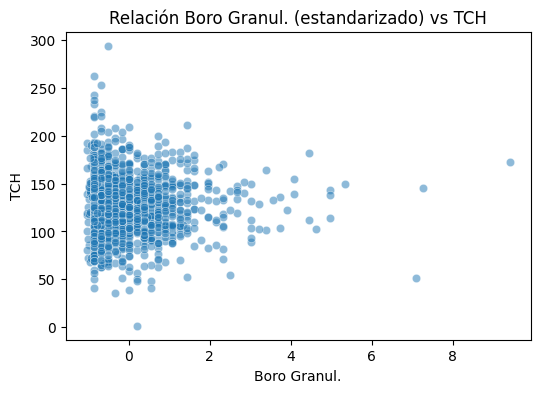

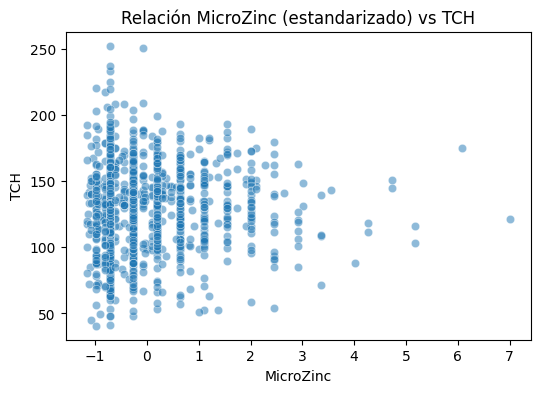

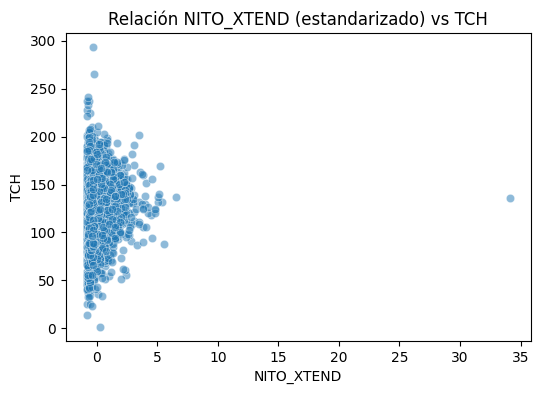

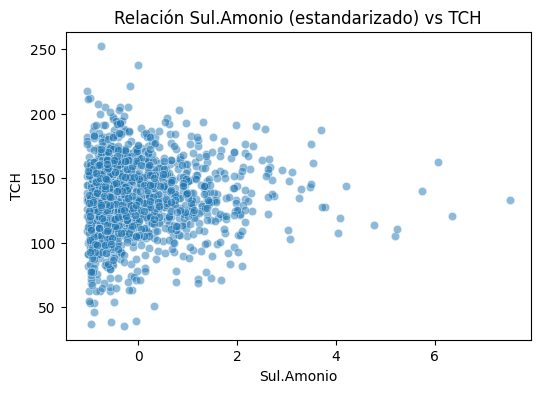

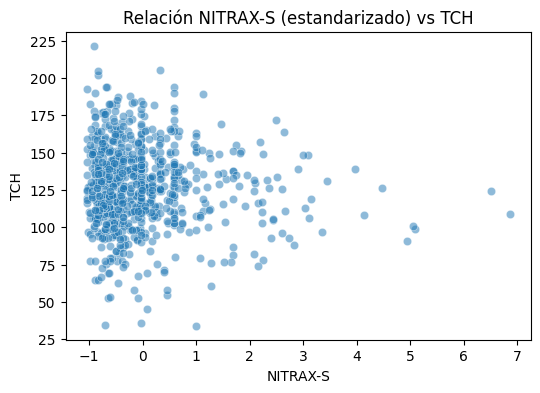

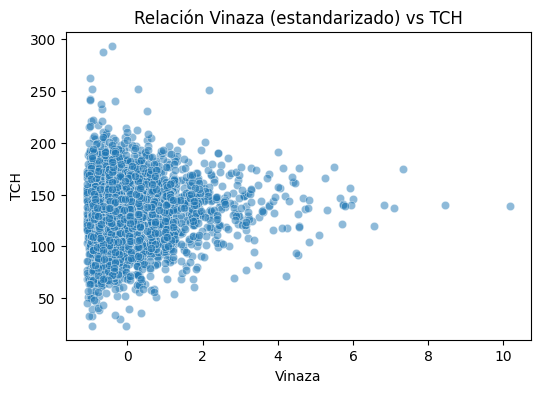

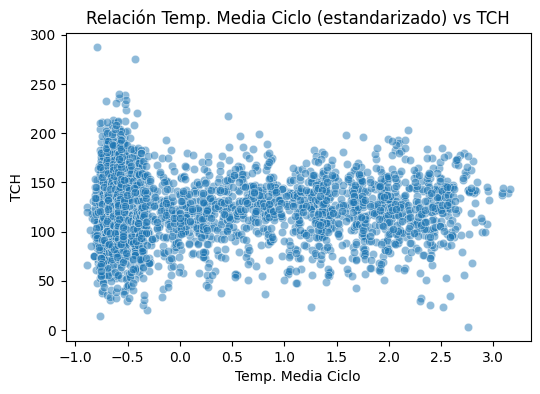

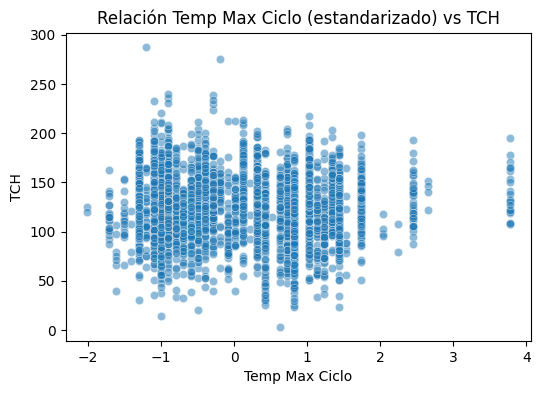

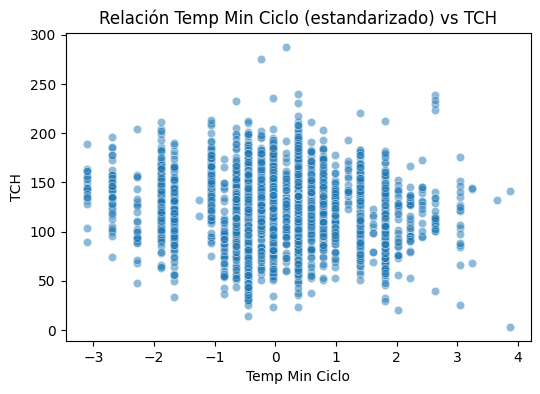

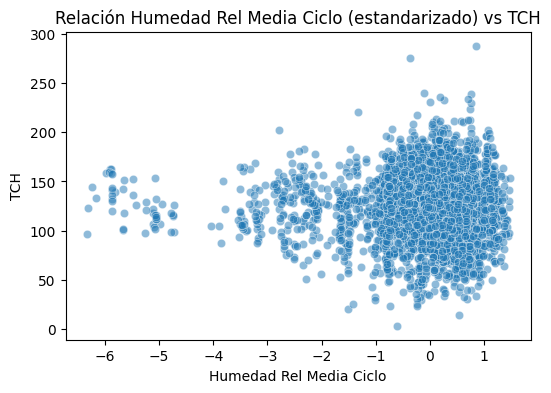

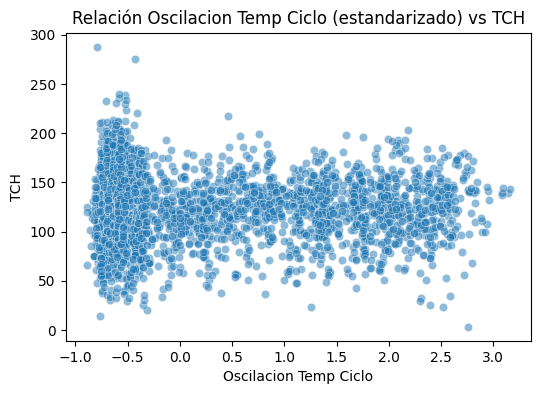

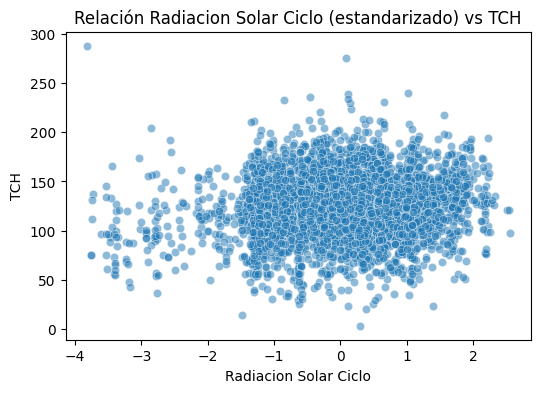

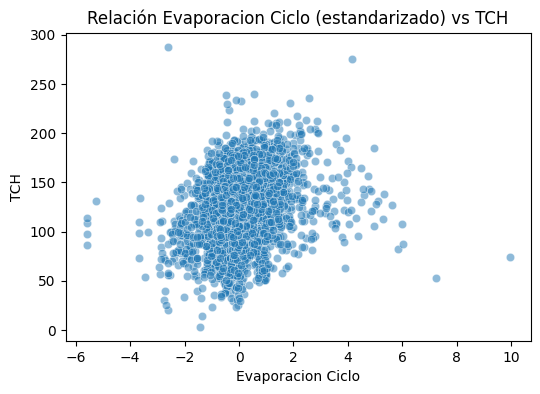

In [23]:
from sklearn.preprocessing import StandardScaler
df_filtered = df.copy()
numericas = df_filtered.select_dtypes(include='number').columns

numericas_sin_tch = [col for col in numericas if col != 'TCH']

scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[numericas_sin_tch] = scaler.fit_transform(df_filtered[numericas_sin_tch])

for col in numericas_sin_tch:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_scaled[col], y=df_scaled['TCH'], alpha=0.5)
    plt.title(f"Relación {col} (estandarizado) vs TCH")
    plt.show()

---
#### **Porcentaje de Nulos**

In [24]:
null_percent = df_filtered.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Fert.Nitrogen.             100.000000
Urea 46%                    96.561564
NITRAX-S                    96.442669
MEZ                         95.382128
MicroZinc                   94.535597
Boro Granul.                93.888810
Sul.Amonio                  93.546393
NITO_XTEND                  82.503448
Vinaza                      80.510772
Evaporacion Ciclo           78.456271
Humedad Rel Media Ciclo     78.456271
Temp Min Ciclo              78.456271
Oscilacion Temp Ciclo       78.456271
Radiacion Solar Ciclo       78.456271
Temp Max Ciclo              78.456271
Temp. Media Ciclo           78.456271
%Infest.Diatrea             73.367575
Codigo Estacion             70.109859
D.S.                        65.910496
Num.Riegos                  59.870643
Edad.Precosecha             57.583107
Producto                    46.502116
Fec.Madur.                  46.487849
Semanas mad.                46.487849
Suelo                       17.872259
Vejez                       11.627907
Fosfato Jugo

In [25]:
PRODUCTS_FEATURES = ['Fert.Nitrogen.', 'Urea 46%', 'NITRAX-S', 'MEZ', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio', 'NITO_XTEND', 'Vinaza']
#df_filtered = df_filtered.drop(columns = PRODUCTS_FEATURES)

df_filtered[PRODUCTS_FEATURES] = df_filtered[PRODUCTS_FEATURES].fillna(0)

In [26]:
df_filtered = df_filtered[df_filtered[WEATHERING_FEATURES].notna().all(axis=1)]

In [27]:
df_filtered['%Infest.Diatrea'] = df_filtered['%Infest.Diatrea'].fillna(0)

In [28]:
df_filtered = df_filtered.drop(columns = ['Codigo Estacion'])

In [29]:
df_filtered = df_filtered.drop(columns = ['D.S.'])

In [30]:
df_filtered = df_filtered.drop(columns = ['Fosfato Jugo'])

In [31]:
null_percent = df_filtered.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Edad.Precosecha            99.713024
Num.Riegos                 57.152318
Semanas mad.               50.883002
Producto                   50.883002
Fec.Madur.                 50.883002
Vejez                       5.165563
Suelo                       4.459161
Dosis Madurante             0.176600
Edad Ult Cos                0.000000
F.Ult.Corte                 0.000000
Variedad                    0.000000
Dist Km                     0.000000
Area Neta                   0.000000
Cod.Estado #                0.000000
Cod. T.Cultivo              0.000000
TCH                         0.000000
Destino 1=Semilla           0.000000
Tipo Quema                  0.000000
T.Corte                     0.000000
M3 Riego                    0.000000
DDUlt.Riego                 0.000000
Lluvias Ciclo               0.000000
%Infest.Diatrea             0.000000
Fert.Nitrogen.              0.000000
Urea 46%                    0.000000
MEZ                         0.000000
Boro Granul.                0.000000
M

In [32]:
df_filtered = df_filtered.drop(columns=['Edad.Precosecha'])

In [33]:
umbral = 100 
variedad_comunes = df_filtered['Variedad'].value_counts()[df_filtered['Variedad'].value_counts() >= umbral].index 
df_filtered['Variedad'] = df_filtered['Variedad'].apply(lambda x: x if x in variedad_comunes else "Otras_Variedades")

In [34]:
umbral = 100 
producto_comunes = df_filtered['Producto'].value_counts()[df_filtered['Producto'].value_counts() >= umbral].index 
df_filtered['Producto'] = df_filtered['Producto'].apply(lambda x: x if x in producto_comunes else "Otros_Productos")

--- 
#### **Evaluación y preprocesamiento General**

In [34]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(['TCH'], axis=1)
y = df_filtered['TCH']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)


#### **Regresión Lineal**

In [35]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, GridSearchCV

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)

cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)
print("\n--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio: {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")

param_grid = {'alpha': np.logspace(-4, 2, 100)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

grid_search_lasso = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {grid_search_ridge.best_estimator_.score(X_train_prep, y_train):.4f}")

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {grid_search_lasso.best_estimator_.score(X_train_prep, y_train):.4f}")


c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 647.1173 (+/- 40.6591)
RMSE promedio: 25.4260 (+/- 0.7968)
R^2 promedio: 0.3235 (+/- 0.0390)

--- Ridge (L2) ---
Mejor alpha: 4.0370
Mejor MSE (CV): 640.9431
Mejor RMSE (CV): 25.3169
Train R²: 0.3886

--- Lasso (L1) ---
Mejor alpha: 0.0231
Mejor MSE (CV): 645.3347
Mejor RMSE (CV): 25.4034
Train R²: 0.3765


In [36]:
from sklearn.preprocessing import PolynomialFeatures
numeric_poly = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)) 
])

preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_poly, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('regressor', LinearRegression())
])

cv_scores_poly_mse = -cross_val_score(
    pipeline_poly,
    X_train, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_poly_r2 = cross_val_score(
    pipeline_poly,
    X_train, y_train,
    cv=5,
    scoring='r2'
)

print("\n--- Regresión Polinómica (grado=2) ---")
print(f"MSE promedio: {np.mean(cv_scores_poly_mse):.4f} (+/- {np.std(cv_scores_poly_mse):.4f})")
print(f"RMSE promedio: {np.sqrt(np.mean(cv_scores_poly_mse)):.4f}")
print(f"R^2 promedio: {np.mean(cv_scores_poly_r2):.4f} (+/- {np.std(cv_scores_poly_r2):.4f})")

c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] 


--- Regresión Polinómica (grado=2) ---
MSE promedio: 3052.5148 (+/- 2109.7941)
RMSE promedio: 55.2496
R^2 promedio: -2.1621 (+/- 2.1552)


c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



--- Características más importantes según Lasso ---
                Característica  Coeficiente   abs_coef
31      cat__Variedad_CC09-066    18.758936  18.758936
30      cat__Variedad_CC05-430    14.603229  14.603229
35     cat__Variedad_RB73-2223    -9.250121   9.250121
33       cat__Variedad_CC85-92    -7.803529   7.803529
29      num__Evaporacion Ciclo     5.676479   5.676479
28  num__Radiacion Solar Ciclo     5.206000   5.206000
7            num__Semanas mad.    -4.830290   4.830290
25         num__Temp Min Ciclo    -4.050567   4.050567
24         num__Temp Max Ciclo    -3.475047   3.475047
4       num__Destino 1=Semilla    -2.586684   2.586684
10               num__M3 Riego     2.535621   2.535621
3            num__Edad Ult Cos     2.136531   2.136531
13        num__%Infest.Diatrea     2.073812   2.073812
2            num__Cod.Estado #    -1.967422   1.967422
6         num__Dosis Madurante    -1.962272   1.962272
8                   num__Vejez    -1.691571   1.691571
23      num_

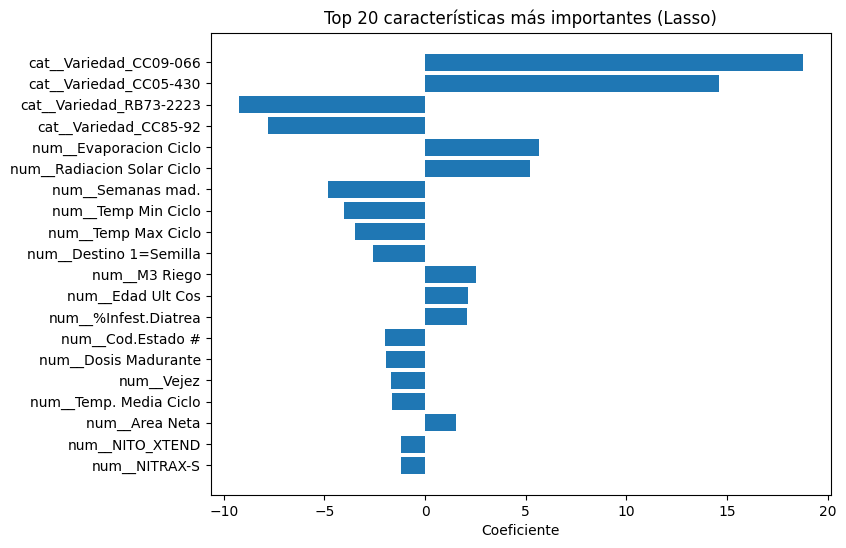


--- Características más influyentes según Ridge ---
                   Característica  Coeficiente   abs_coef
31         cat__Variedad_CC09-066    18.725000  18.725000
30         cat__Variedad_CC05-430    14.390949  14.390949
35        cat__Variedad_RB73-2223   -11.029980  11.029980
33          cat__Variedad_CC85-92    -8.843621   8.843621
28     num__Radiacion Solar Ciclo     5.594577   5.594577
29         num__Evaporacion Ciclo     5.072209   5.072209
7               num__Semanas mad.    -4.938318   4.938318
25            num__Temp Min Ciclo    -4.129910   4.129910
24            num__Temp Max Ciclo    -3.569915   3.569915
37        cat__T.Corte_MECANIZADO     3.544874   3.544874
38           cat__T.Corte_NO DEF.     3.049221   3.049221
3               num__Edad Ult Cos     2.827567   2.827567
4          num__Destino 1=Semilla    -2.676714   2.676714
10                  num__M3 Riego     2.592838   2.592838
13           num__%Infest.Diatrea     2.113375   2.113375
2               num

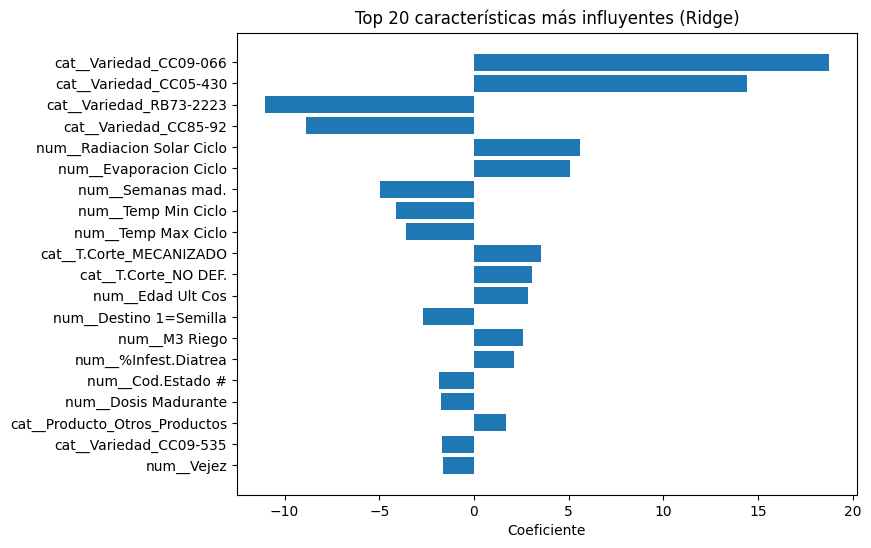

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Lasso ---
best_lasso_model = grid_search_lasso.best_estimator_
lasso_coeffs = best_lasso_model.coef_
feature_names = preprocessor.get_feature_names_out()

df_lasso = pd.DataFrame({
    'Característica': feature_names,
    'Coeficiente': lasso_coeffs
})

significant_lasso = (
    df_lasso[df_lasso['Coeficiente'] != 0]
    .assign(abs_coef=lambda d: d['Coeficiente'].abs())
    .sort_values(by='abs_coef', ascending=False)
)

print("\n--- Características más importantes según Lasso ---")
print(significant_lasso.head(20))

plt.figure(figsize=(8, 6))
plt.barh(significant_lasso.head(20)['Característica'],
         significant_lasso.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más importantes (Lasso)")
plt.xlabel("Coeficiente")
plt.show()

best_ridge_model = grid_search_ridge.best_estimator_
ridge_coeffs = best_ridge_model.coef_

df_ridge = pd.DataFrame({
    'Característica': feature_names,
    'Coeficiente': ridge_coeffs,
    'abs_coef': abs(ridge_coeffs)
}).sort_values(by='abs_coef', ascending=False)

print("\n--- Características más influyentes según Ridge ---")
print(df_ridge.head(20))

plt.figure(figsize=(8, 6))
plt.barh(df_ridge.head(20)['Característica'],
         df_ridge.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más influyentes (Ridge)")
plt.xlabel("Coeficiente")
plt.show()


In [38]:
# --- Lasso: todas las características ---
df_lasso_all = (
    df_lasso
    .assign(abs_coef=lambda d: d['Coeficiente'].abs())
    .sort_values(by='abs_coef', ascending=True)   # ASC para ver las menos influyentes primero
)

print("\n--- TODAS las características (Lasso) ordenadas por |coef| ---")
print(df_lasso_all)

df_ridge_all = (
    df_ridge
    .sort_values(by='abs_coef', ascending=True)   
)

print("\n--- TODAS las características (Ridge) ordenadas por |coef| ---")
print(df_ridge_all)



--- TODAS las características (Lasso) ordenadas por |coef| ---
                    Característica  Coeficiente   abs_coef
1                     num__Dist Km     0.000000   0.000000
14             num__Fert.Nitrogen.     0.000000   0.000000
15                   num__Urea 46%     0.000000   0.000000
22                     num__Vinaza     0.000000   0.000000
34  cat__Variedad_Otras_Variedades    -0.000000   0.000000
38            cat__T.Corte_NO DEF.     0.000000   0.000000
32          cat__Variedad_CC09-535    -0.000000   0.000000
27      num__Oscilacion Temp Ciclo    -0.060914   0.060914
17               num__Boro Granul.    -0.061431   0.061431
16                        num__MEZ     0.067328   0.067328
12              num__Lluvias Ciclo     0.224639   0.224639
18                  num__MicroZinc     0.243053   0.243053
20                 num__Sul.Amonio     0.287010   0.287010
11                num__DDUlt.Riego    -0.441952   0.441952
26    num__Humedad Rel Media Ciclo    -0.497204   0